Epoch 1/30
469/469 - 3s - loss: 0.0161 - accuracy: 0.8942 - val_loss: 0.0106 - val_accuracy: 0.9325 - 3s/epoch - 7ms/step
Epoch 2/30
469/469 - 2s - loss: 0.0093 - accuracy: 0.9400 - val_loss: 0.0085 - val_accuracy: 0.9449 - 2s/epoch - 4ms/step
Epoch 3/30
469/469 - 2s - loss: 0.0070 - accuracy: 0.9556 - val_loss: 0.0066 - val_accuracy: 0.9593 - 2s/epoch - 4ms/step
Epoch 4/30
469/469 - 2s - loss: 0.0056 - accuracy: 0.9646 - val_loss: 0.0060 - val_accuracy: 0.9614 - 2s/epoch - 3ms/step
Epoch 5/30
469/469 - 2s - loss: 0.0046 - accuracy: 0.9712 - val_loss: 0.0052 - val_accuracy: 0.9667 - 2s/epoch - 3ms/step
Epoch 6/30
469/469 - 2s - loss: 0.0039 - accuracy: 0.9759 - val_loss: 0.0046 - val_accuracy: 0.9699 - 2s/epoch - 4ms/step
Epoch 7/30
469/469 - 2s - loss: 0.0033 - accuracy: 0.9798 - val_loss: 0.0043 - val_accuracy: 0.9719 - 2s/epoch - 3ms/step
Epoch 8/30
469/469 - 2s - loss: 0.0029 - accuracy: 0.9830 - val_loss: 0.0041 - val_accuracy: 0.9726 - 2s/epoch - 4ms/step
Epoch 9/30
469/469 - 2s 

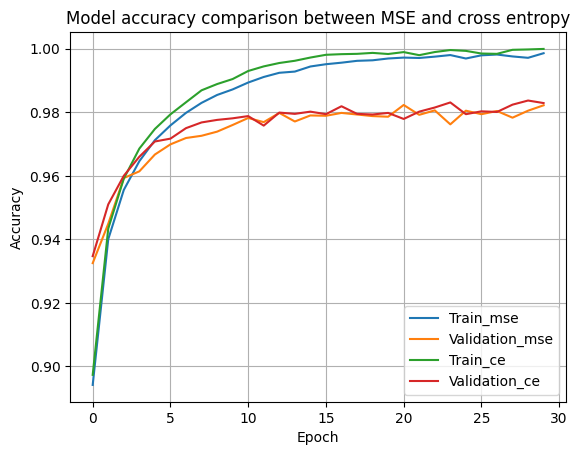

In [3]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train=x_train.astype(np.float32)/225.0
x_test=x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test= tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정정
n_input=784
n_hidden1=1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output=10

# 평균제곱오차를 사용한 모델
dmlp_mse=Sequential()
dmlp_mse.add(Dense(units=n_hidden1, activation='tanh',input_shape=(n_input,)))
dmlp_mse.add(Dense(units=n_hidden2, activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden3, activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden4, activation='tanh'))
dmlp_mse.add(Dense(units=n_output, activation='softmax'))
dmlp_mse.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_mse=dmlp_mse.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test),verbose=2)

# 교차 엔트로피를 사용한 모델델
dmlp_ce=Sequential()
dmlp_ce.add(Dense(units=n_hidden1, activation='tanh',input_shape=(n_input,)))
dmlp_ce.add(Dense(units=n_hidden2, activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden3, activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden4, activation='tanh'))
dmlp_ce.add(Dense(units=n_output, activation='softmax'))
dmlp_ce.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_ce=dmlp_ce.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test),verbose=2)

# 두 모델의 정확률 비교교
res_mse=dmlp_mse.evaluate(x_test, y_test, verbose=0)
print("평균제곱오차의 정확률은 ", res_mse[1]*100)
res_ce=dmlp_ce.evaluate(x_test, y_test, verbose=0)
print("교차 엔트로피의 정확률은 ", res_ce[1]*100)

# 하나의 그래프에서 두 모델을 비교교
import matplotlib.pyplot as plt

plt.plot(hist_mse.history['accuracy'])
plt.plot(hist_mse.history['val_accuracy'])
plt.plot(hist_ce.history['accuracy'])
plt.plot(hist_ce.history['val_accuracy'])
plt.title('Model accuracy comparison between MSE and cross entropy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_mse', 'Validation_mse', 'Train_ce', 'Validation_ce'], loc='best')
plt.grid()
plt.show()